In [ ]:
#importing the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Import evaluation metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
raw_data =  pd.read_csv("/content/heart_disease_uci.csv")

In [ ]:
raw_data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
print(f'Number of rows: {raw_data.shape[0]}')
print(f'Number of columns: {raw_data.shape[1]}')

Number of rows: 920
Number of columns: 16


In [ ]:
raw_data_columns = raw_data.columns
print(raw_data_columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [ ]:
raw_data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
raw_data_numerical_columns = raw_data.select_dtypes(include=np.number).columns
raw_data_categorical_columns = raw_data.select_dtypes(include=['object', 'category']).columns

# Print the numerical column names
print(raw_data_numerical_columns)
print(raw_data_categorical_columns)

Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')
Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


In [ ]:
raw_data['dataset'].value_counts()

,count
dataset,
Cleveland,304
Hungary,293
VA Long Beach,200
Switzerland,123


In [ ]:
raw_data['cp'].value_counts()

,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


In [ ]:
raw_data['fbs'].value_counts()

,count
fbs,
False,692
True,138


In [ ]:
raw_data['restecg'].value_counts()

,count
restecg,
normal,551
lv hypertrophy,188
st-t abnormality,179


In [ ]:
raw_data['exang'].value_counts()

,count
exang,
False,528
True,337


In [ ]:
raw_data['slope'].value_counts()

,count
slope,
flat,345
upsloping,203
downsloping,63


In [ ]:
raw_data['thal'].value_counts()

,count
thal,
normal,196
reversable defect,192
fixed defect,46


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
import pandas as pd

# Assuming you already have your DataFrame, let's call it `df`

# Count the number of missing values in each row
missing_values_per_row = raw_data.isnull().sum(axis=1)

# Filter rows where the count of missing values is more than 8
rows_with_missing_values_above_8 = missing_values_per_row[missing_values_per_row > 2]

# Get the count of such rows
num_rows_with_missing_values_above_8 = len(rows_with_missing_values_above_8)

print(f"Number of rows with missing values in more than 8 columns: {num_rows_with_missing_values_above_8}")


Number of rows with missing values in more than 8 columns: 339


In [ ]:
raw_data.nunique()

,0
id,920
age,50
sex,2
dataset,4
cp,4
trestbps,61
chol,217
fbs,2
restecg,3
thalch,119


In [ ]:
#missing values in %age
print(raw_data.isnull().sum().sort_values(ascending=False)/len(raw_data)*100)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64


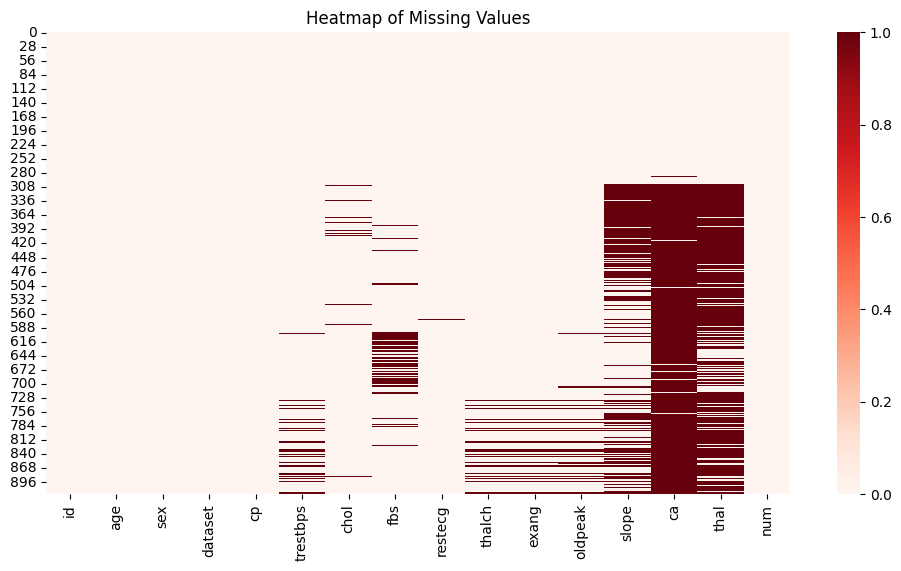

In [ ]:
# Heatmap of missing values

fig = plt.figure(figsize=(12,6))
sns.heatmap(raw_data.isnull(),cbar=True,cmap='Reds')
plt.title('Heatmap of Missing Values')
plt.show()

In [ ]:
print(raw_data_numerical_columns)
print(raw_data_categorical_columns)

Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')
Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


In [ ]:
# impute missing values in numeric columns using iterative imputer

raw_data[raw_data_numerical_columns] = IterativeImputer().fit_transform(raw_data[raw_data_numerical_columns])

# check null values

print(raw_data.isnull().sum().sort_values(ascending=False)/len(raw_data)*100)

thal        52.826087
slope       33.586957
fbs          9.782609
exang        5.978261
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
chol         0.000000
thalch       0.000000
oldpeak      0.000000
ca           0.000000
num          0.000000
dtype: float64


In [ ]:
raw_data[raw_data_categorical_columns]

,sex,dataset,cp,fbs,restecg,exang,slope,thal
0,Male,Cleveland,typical angina,True,lv hypertrophy,False,downsloping,fixed defect
1,Male,Cleveland,asymptomatic,False,lv hypertrophy,True,flat,normal
2,Male,Cleveland,asymptomatic,False,lv hypertrophy,True,flat,reversable defect
3,Male,Cleveland,non-anginal,False,normal,False,downsloping,normal
4,Female,Cleveland,atypical angina,False,lv hypertrophy,False,upsloping,normal
...,...,...,...,...,...,...,...,...
915,Female,VA Long Beach,asymptomatic,True,st-t abnormality,False,NaN,NaN
916,Male,VA Long Beach,typical angina,False,st-t abnormality,NaN,NaN,NaN
917,Male,VA Long Beach,asymptomatic,True,st-t abnormality,False,NaN,fixed defect
918,Male,VA Long Beach,asymptomatic,True,lv hypertrophy,NaN,NaN,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Loop over each categorical column and apply imputation
for col in raw_data_categorical_columns:
    # Separate data into known and unknown values for the current column
    known_data = raw_data[raw_data[col].notna()]
    unknown_data = raw_data[raw_data[col].isna()]

    # Check if there are any unknown values to impute
    if unknown_data.shape[0] > 0:  # Proceed only if there are unknown values
        # Get a list of columns to drop (including the target column and categorical columns)
        columns_to_drop = [col] + raw_data_categorical_columns

        # Filter out only the columns that exist in 'known_data' to avoid the KeyError
        columns_to_drop = [column for column in columns_to_drop if column in known_data.columns]

        # Define features and target for the Random Forest model
        X_known = known_data.drop(columns=columns_to_drop)  # Exclude all specified columns
        y_known = known_data[col]
        X_unknown = unknown_data.drop(columns=columns_to_drop)  # Exclude all specified columns

        # Apply LabelEncoder to the features (X_known) and target (y_known)
        label_encoder = LabelEncoder()

        # Apply encoding to categorical features in X_known
        for feature in X_known.select_dtypes(include=['object', 'category']).columns:
            X_known[feature] = label_encoder.fit_transform(X_known[feature])

        # Apply encoding to categorical features in X_unknown
        for feature in X_unknown.select_dtypes(include=['object', 'category']).columns:
            X_unknown[feature] = label_encoder.fit_transform(X_unknown[feature])

        # Apply encoding to the target variable (y_known)
        y_known_encoded = label_encoder.fit_transform(y_known)

        # Create and train a Random Forest classifier
        model = RandomForestClassifier()
        model.fit(X_known, y_known_encoded)

        # Predict missing values and impute them in the DataFrame
        imputed_values = model.predict(X_unknown)
        imputed_values = label_encoder.inverse_transform(imputed_values)  # Inverse transform to get original labels
        raw_data.loc[raw_data[col].isna(), col] = imputed_values


In [ ]:
raw_data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.0,63.0,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0.0
1,2.0,67.0,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,2.0
2,3.0,67.0,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1.0
3,4.0,37.0,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0.0
4,5.0,41.0,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916.0,54.0,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,downsloping,0.988755,fixed defect,1.0
916,917.0,62.0,Male,VA Long Beach,typical angina,136.556831,139.0,False,st-t abnormality,117.195494,False,0.459087,downsloping,0.754967,fixed defect,0.0
917,918.0,55.0,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,downsloping,1.212196,fixed defect,2.0
918,919.0,58.0,Male,VA Long Beach,asymptomatic,141.063635,385.0,True,lv hypertrophy,121.002264,False,0.767936,downsloping,0.744965,fixed defect,0.0


In [ ]:
# impute missing values in numeric columns using iterative imputer

raw_data[raw_data_numerical_columns] = IterativeImputer().fit_transform(raw_data[raw_data_numerical_columns])

# check null values

print(raw_data.isnull().sum().sort_values(ascending=False)/len(raw_data)*100)

id          0.0
age         0.0
sex         0.0
dataset     0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64


In [ ]:
# Save DataFrame to CSV
raw_data.to_csv('raw_test.csv', index=False)


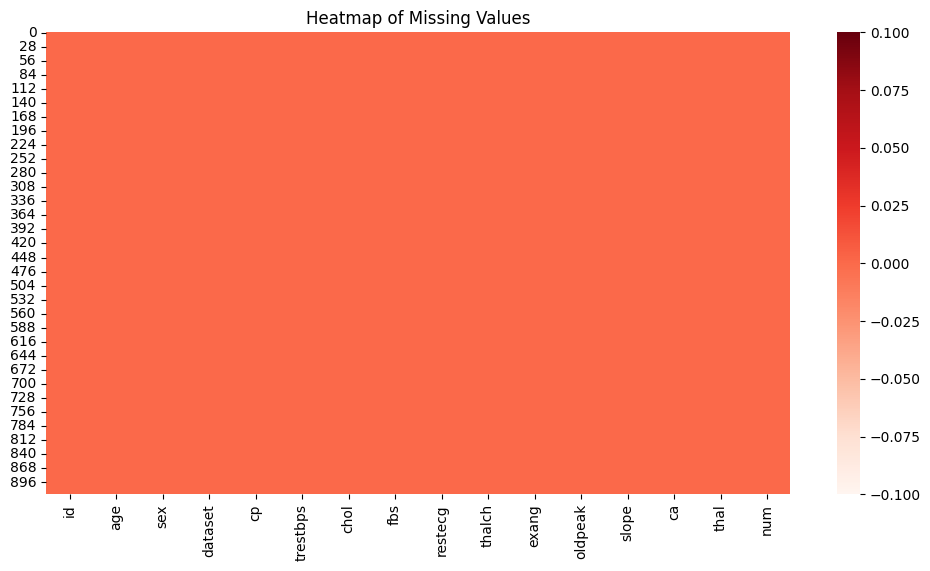

In [ ]:
# Heatmap of missing values

fig = plt.figure(figsize=(12,6))
sns.heatmap(raw_data.isnull(),cbar=True,cmap='Reds')
plt.title('Heatmap of Missing Values')
plt.show()

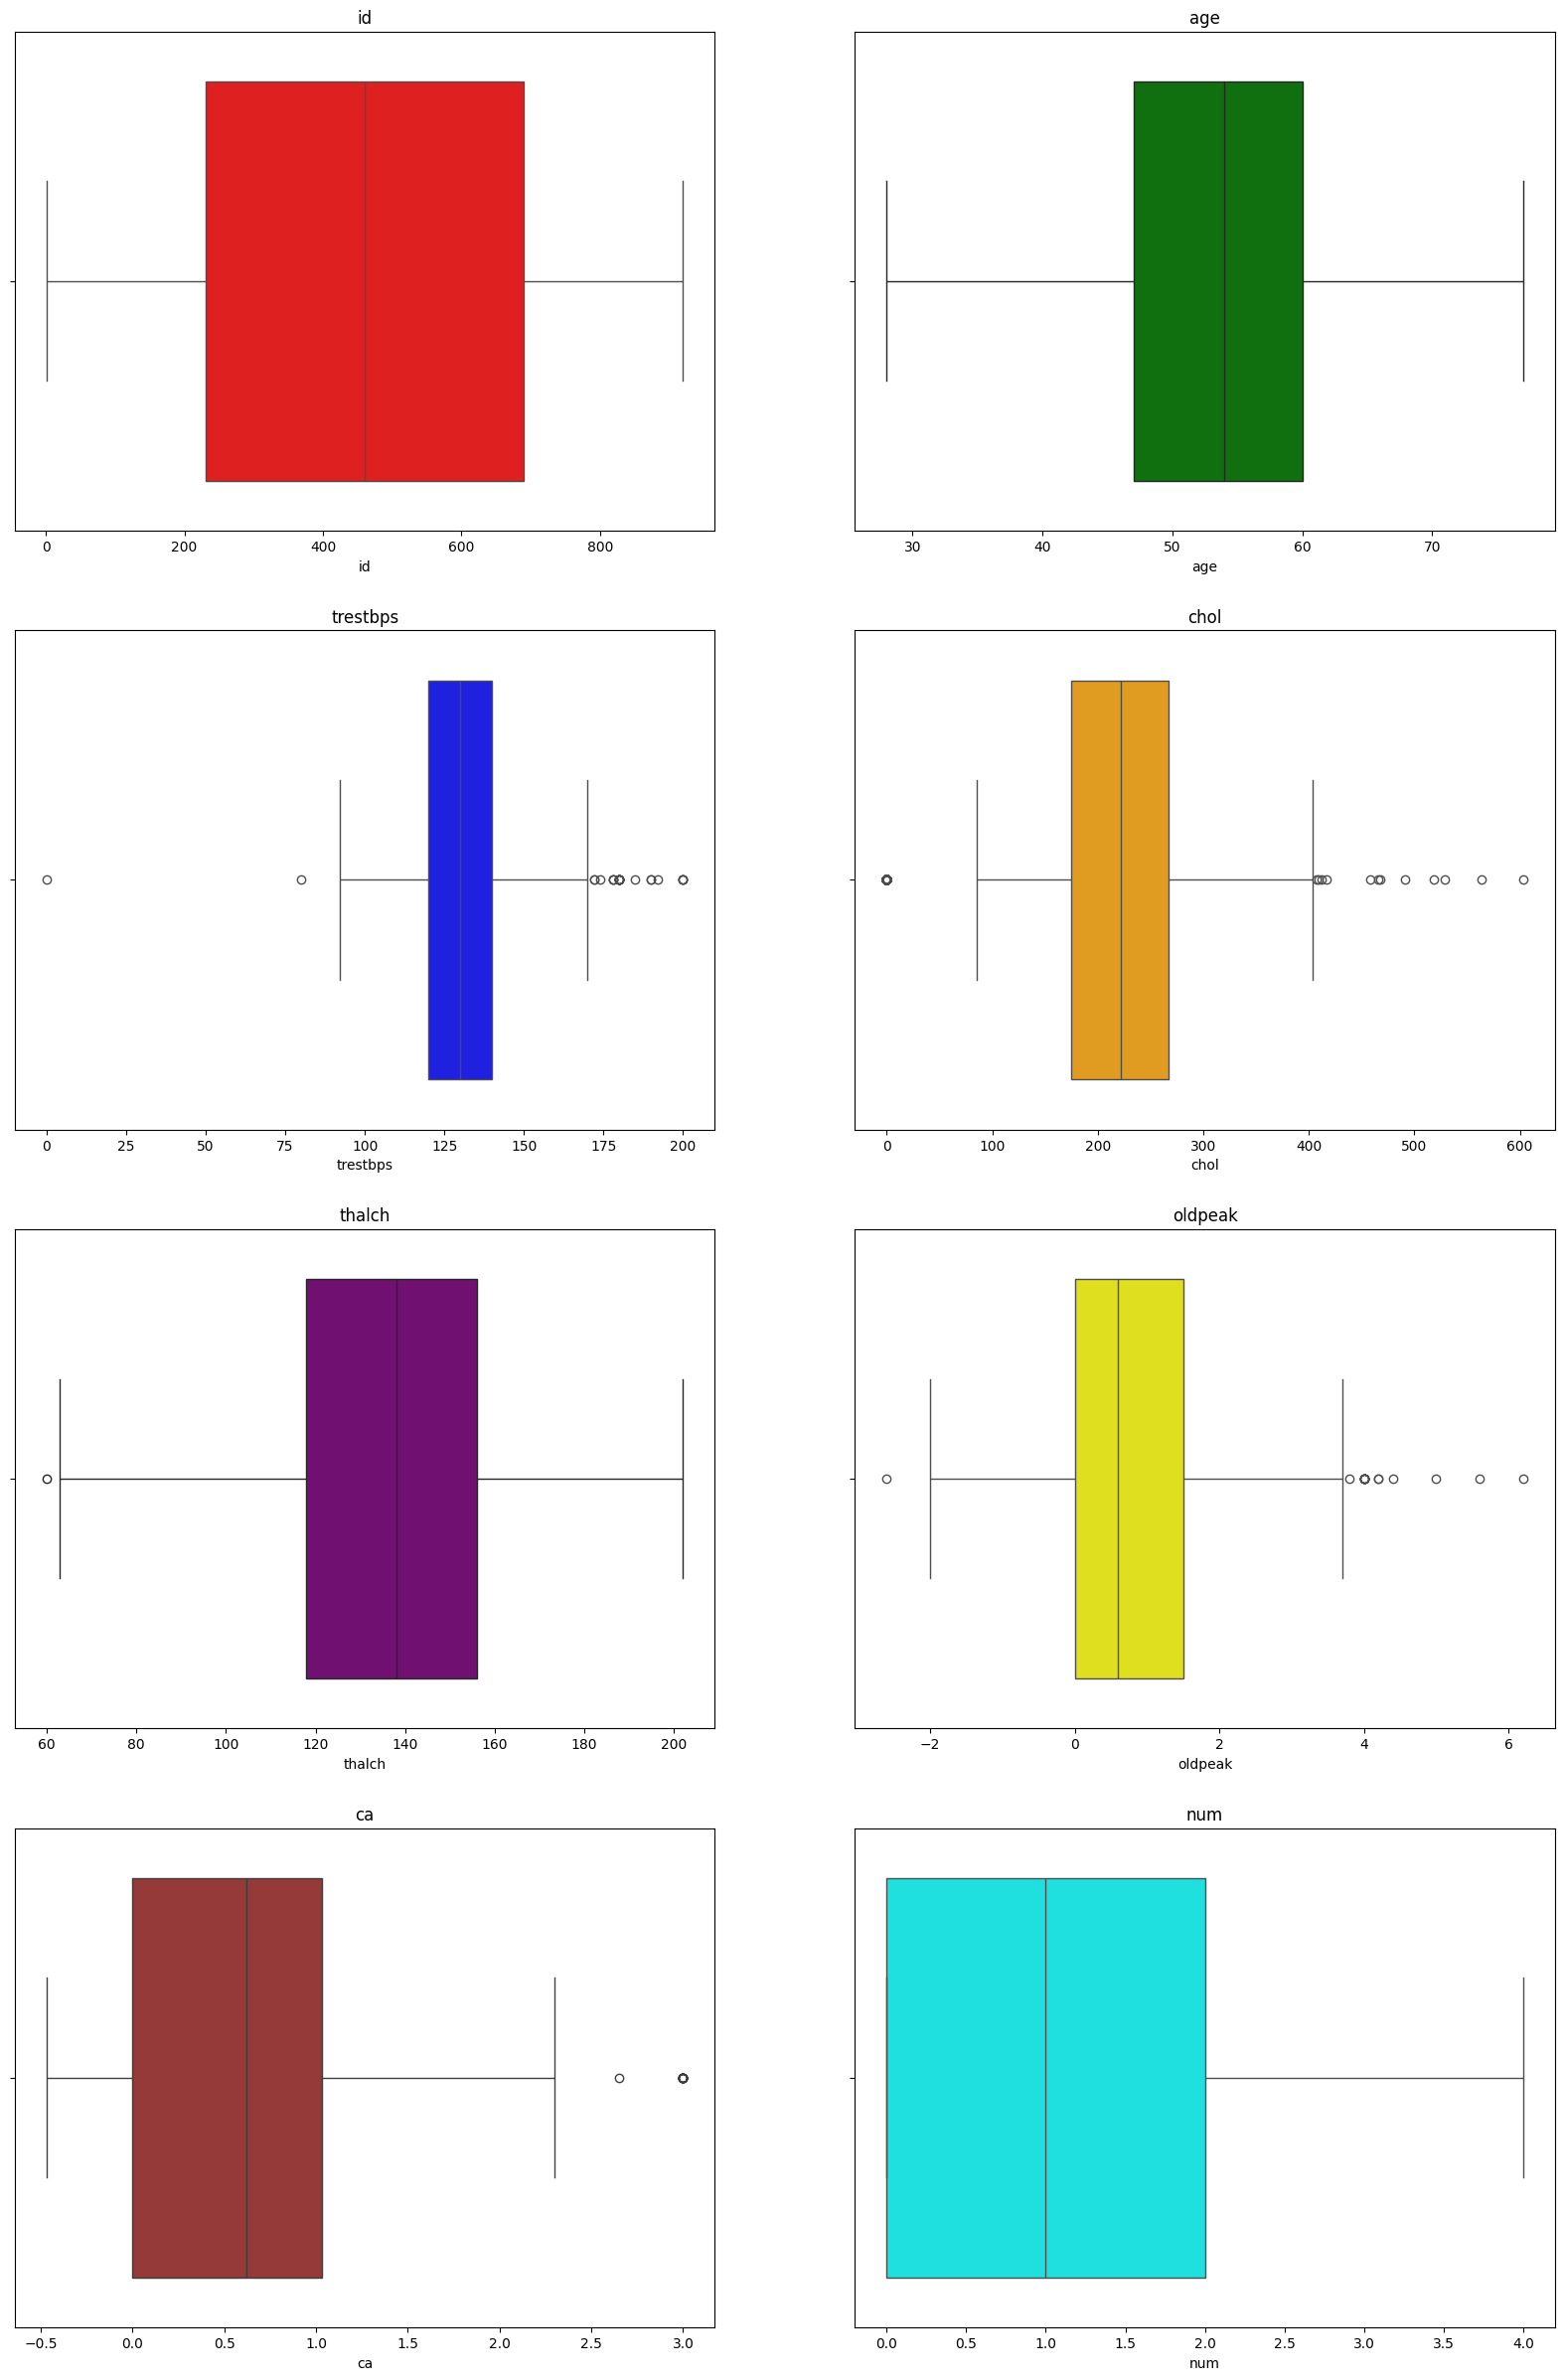

In [ ]:
# Boxplot of numeric columns using for loop
plt.figure(figsize=(20, 30))

# Extend the colors list to have at least as many colors as num_cols
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'brown', 'cyan', 'magenta']

# Adjusted subplot grid to 4 rows, 2 columns to accommodate 8 plots
for i, col in enumerate(raw_data_numerical_columns):
    plt.subplot(4, 2, i+1)  # Changed to 4 rows, 2 columns
    sns.boxplot(x=raw_data[col], color=colors[i % len(colors)]) # Use modulo operator to cycle through colors
    plt.title(col)
plt.show()

In [ ]:
# remove row where trestbps is 0

raw_data.drop(raw_data[raw_data['trestbps']==0].index,inplace=True)

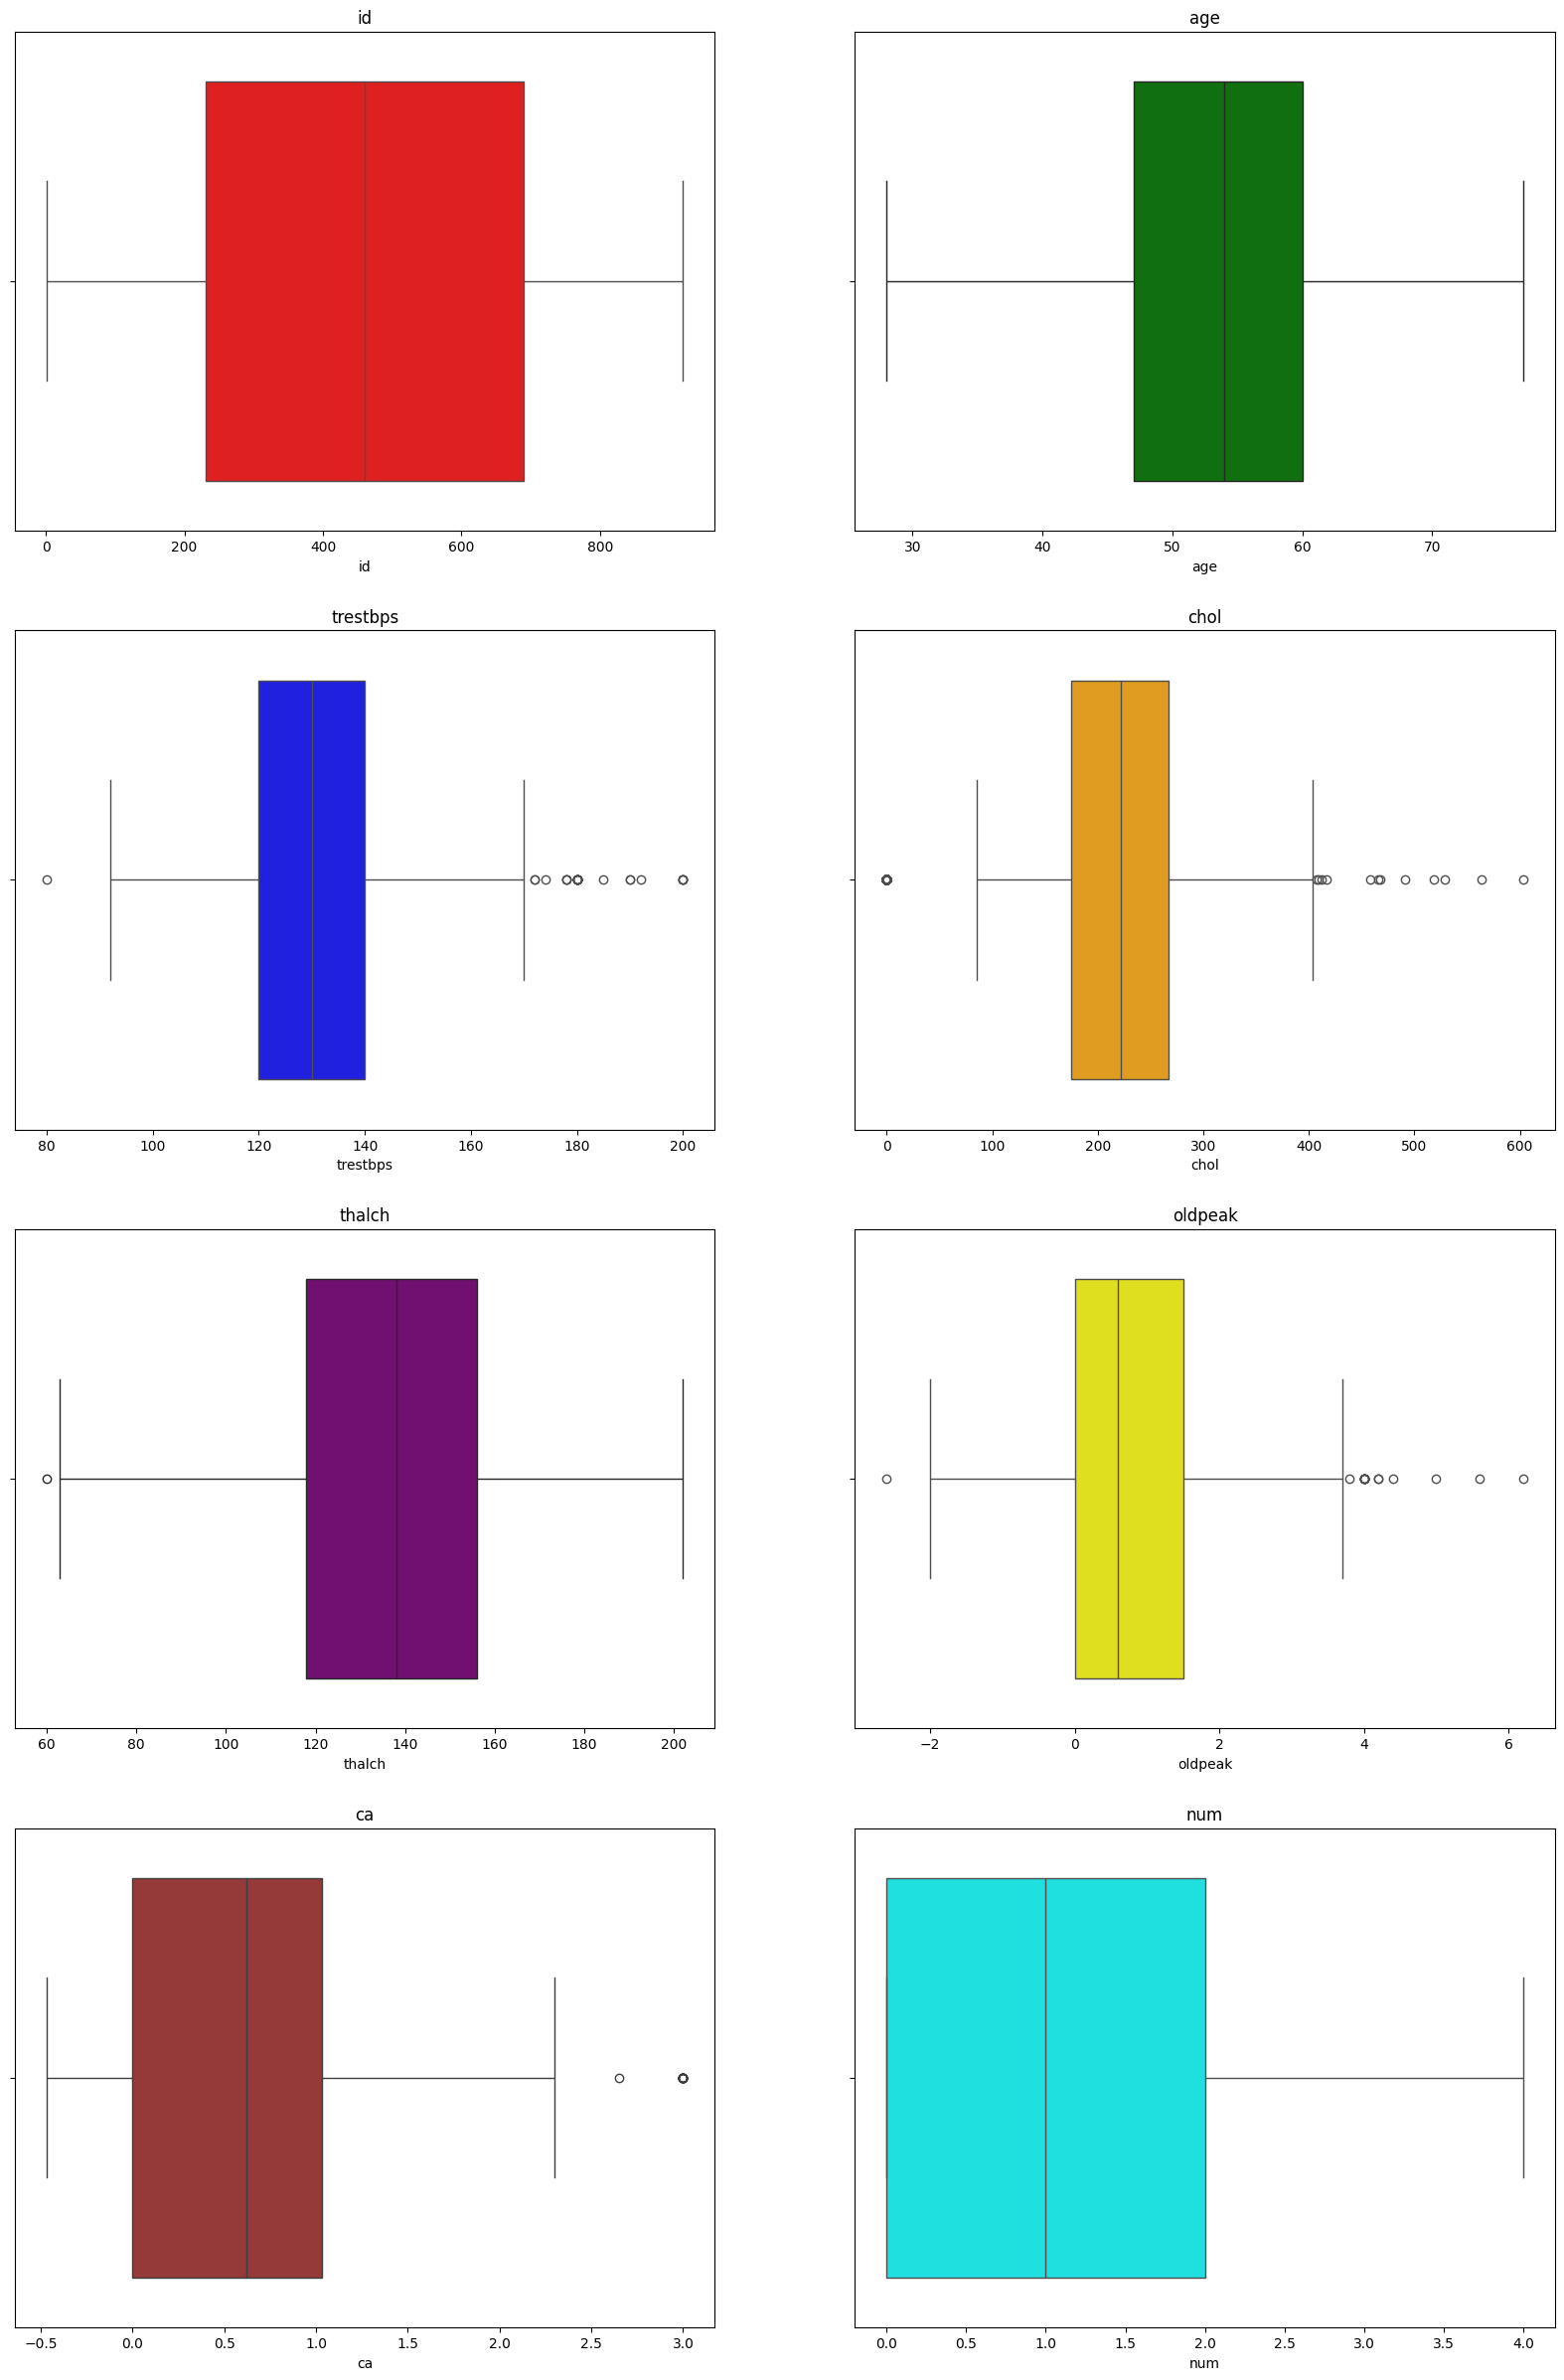

In [ ]:
# Boxplot of numeric columns using for loop
plt.figure(figsize=(20, 30))

# Extend the colors list to have at least as many colors as num_cols
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'brown', 'cyan', 'magenta']

# Adjusted subplot grid to 4 rows, 2 columns to accommodate 8 plots
for i, col in enumerate(raw_data_numerical_columns):
    plt.subplot(4, 2, i+1)  # Changed to 4 rows, 2 columns
    sns.boxplot(x=raw_data[col], color=colors[i % len(colors)]) # Use modulo operator to cycle through colors
    plt.title(col)
plt.show()

In [ ]:
# Split data into X and y

X = raw_data.drop(['num','id'],axis=1)
y = raw_data['num']

## We have to predict num variable which is having value from 0-4 which are nothing but CADRADS and value greater than 2 will be considered as diseased which is 1 and rest is non diseased. Thats why I performed the below step

Source : https://www.journalofcardiovascularct.com/article/S1934-5925(22)00240-4/fulltext

In [ ]:
y = raw_data['num'].apply(lambda x: 0 if x in [0, 1, 2] else 1)

In [ ]:
# le = LabelEncoder()
# X['sex'] = le.fit_transform(X['sex'])
# X['dataset'] = le.fit_transform(X['dataset'])
# X['cp'] = le.fit_transform(X['cp'])
# X['fbs'] = le.fit_transform(X['fbs'])
# X['restecg'] = le.fit_transform(X['restecg'])
# X['exang'] = le.fit_transform(X['exang'])
# X['slope'] = le.fit_transform(X['slope'])
# X['thal'] = le.fit_transform(X['thal'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns.tolist()

# # Automatically detect numerical columns
# numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Apply one-hot encoding to categorical columns
X_train = pd.get_dummies(X_train, columns=raw_data_categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=raw_data_categorical_columns, drop_first=True)

# Align columns in case train and test sets have different categories
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [ ]:
# Standardize numerical features
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score, accuracy_score
models = {'LogisticRegression': LogisticRegression(random_state=42, max_iter=1200),
    # 'LogisticRegressionCV': LogisticRegressionCV(random_state=42, max_iter=1000),
    # 'SVC': SVC(random_state=42, probability=True, decision_function_shape='ovr'),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(random_state=42, n_estimators=75),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
    'GaussianNB': GaussianNB(),
    'LGBMClassifier': LGBMClassifier(verbose=-1, random_state=42)
}

for name, model in models.items():
    print(f"Training {name}...")
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {np.round(accuracy,2)}")
    print(classification_report(y_test, y_pred))

Training LogisticRegression...
LogisticRegression Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       157
           1       0.72      0.48      0.58        27

    accuracy                           0.90       184
   macro avg       0.82      0.72      0.76       184
weighted avg       0.89      0.90      0.89       184

Training DecisionTreeClassifier...
DecisionTreeClassifier Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       157
           1       0.50      0.48      0.49        27

    accuracy                           0.85       184
   macro avg       0.71      0.70      0.70       184
weighted avg       0.85      0.85      0.85       184

Training RandomForestClassifier...
RandomForestClassifier Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       157
           1       0.80    

In [ ]:
# Import necessary libraries
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import numpy as np

# Define the base models (your current models list)
base_models = [
    ('logreg', LogisticRegression(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    # ('rf', RandomForestClassifier(random_state=42)),
    # ('knn', KNeighborsClassifier()),
    ('gb', GradientBoostingClassifier(random_state=42, n_estimators= 75)),
    ('xgb', XGBClassifier(random_state=42)),
    ('ada', AdaBoostClassifier(random_state=42, n_estimators= 50, learning_rate=1)),
    ('gnb', GaussianNB()),
    ('lgbm', LGBMClassifier(verbose=-1, random_state=42))
]

# Define the meta-model (Logistic Regression in this case)
meta_model = XGBClassifier(random_state=42)

# Create the StackingClassifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Split the data into training and testing sets (assuming X and y are defined)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Stacking Classifier on the training data
print("Training Stacking Classifier...")
stacking_clf.fit(X_train, y_train)

# Make predictions with the Stacking Classifier
y_pred = stacking_clf.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {np.round(accuracy, 2)}")
print(classification_report(y_test, y_pred))



Training Stacking Classifier...
Stacking Classifier Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       157
           1       0.74      0.63      0.68        27

    accuracy                           0.91       184
   macro avg       0.84      0.80      0.81       184
weighted avg       0.91      0.91      0.91       184



In [ ]:
# Define the model
xgb = XGBClassifier(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [20, 50, 90],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.5]
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Hyperparameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1.0}
Best Accuracy: 0.9319727891156463


##Feature Selection

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Create the model for feature selection (e.g., Logistic Regression or Random Forest)
model = RandomForestClassifier(random_state=42)

# Initialize RFE with the model
selector = RFE(model, n_features_to_select=4)

# Fit RFE to the data
selector = selector.fit(X_train, y_train)

# Get the top 10 features
top_10_features_rfe = X_train.columns[selector.support_]

# Print top 10 features
print("Top 4 Features based on Recursive Feature Elimination (RFE):")
print(top_10_features_rfe)

Top 4 Features based on Recursive Feature Elimination (RFE):
Index(['age', 'thalch', 'oldpeak', 'ca'], dtype='object')


In [ ]:

X1 = raw_data[raw_data_numerical_columns]
X1 = X1.drop(['id','num','trestbps'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [ ]:
# Import necessary libraries
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import numpy as np

# Define the base models (your current models list)
base_models = [
    ('logreg', LogisticRegression(random_state=42, solver='lbfgs', max_iter=500)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    # ('rf', RandomForestClassifier(random_state=42)),
    # ('knn', KNeighborsClassifier()),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42)),
    ('ada', AdaBoostClassifier(random_state=42)),
    ('gnb', GaussianNB()),
    ('lgbm', LGBMClassifier(verbose=-1, random_state=42))
]

# Define the meta-model (Logistic Regression in this case)
meta_model = XGBClassifier(random_state=42)

# Create the StackingClassifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Split the data into training and testing sets (assuming X and y are defined)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Stacking Classifier on the training data
print("Training Stacking Classifier...")
stacking_clf.fit(X_train, y_train)

# Make predictions with the Stacking Classifier
y_pred = stacking_clf.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {np.round(accuracy, 2)}")
print(classification_report(y_test, y_pred))


Training Stacking Classifier...
Stacking Classifier Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       157
           1       0.85      0.63      0.72        27

    accuracy                           0.93       184
   macro avg       0.89      0.81      0.84       184
weighted avg       0.93      0.93      0.92       184



##Hyperparameter Tunning of best Model which is XGBClassifier

In [ ]:
# Define the model
xgb = XGBClassifier(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [20, 50, 90],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.5]
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 90, 'subsample': 0.9}
Best Accuracy: 0.9333333333333333


In [ ]:
# Import necessary libraries
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import numpy as np

# Define the base models (your current models list)
base_models = [
    ('logreg', LogisticRegression(random_state=42, max_iter=500)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    # ('rf', RandomForestClassifier(random_state=42)),
    # ('knn', KNeighborsClassifier()),
    ('gb', GradientBoostingClassifier(random_state=42, n_estimators= 75)),
    ('xgb', XGBClassifier(random_state=42, min_child_weight=1, n_estimators= 50, learning_rate=0.3)),
    ('ada', AdaBoostClassifier(random_state=42, n_estimators= 50, learning_rate=1)),
    ('gnb', GaussianNB()),
    ('lgbm', LGBMClassifier(verbose=-1, random_state=42))
]

# Define the meta-model (Logistic Regression in this case)
meta_model = XGBClassifier(n_estimators= 50, learning_rate=0.3,random_state=42)

# Create the StackingClassifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Split the data into training and testing sets (assuming X and y are defined)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Stacking Classifier on the training data
print("Training Stacking Classifier...")
stacking_clf.fit(X_train, y_train)

# Make predictions with the Stacking Classifier
y_pred = stacking_clf.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {np.round(accuracy, 2)}")
print(classification_report(y_test, y_pred))


Training Stacking Classifier...
Stacking Classifier Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       157
           1       0.80      0.59      0.68        27

    accuracy                           0.92       184
   macro avg       0.87      0.78      0.82       184
weighted avg       0.91      0.92      0.91       184



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score, accuracy_score
models = {'LogisticRegression': LogisticRegression(random_state=42, max_iter=1200),
    # 'LogisticRegressionCV': LogisticRegressionCV(random_state=42, max_iter=1000),
    # 'SVC': SVC(random_state=42, probability=True, decision_function_shape='ovr'),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(random_state=42, n_estimators=75),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
    'GaussianNB': GaussianNB(),
    'LGBMClassifier': LGBMClassifier(verbose=-1, random_state=42)
}

for name, model in models.items():
    print(f"Training {name}...")
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {np.round(accuracy,2)}")
    print(classification_report(y_test, y_pred))

Training LogisticRegression...
LogisticRegression Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       157
           1       0.75      0.44      0.56        27

    accuracy                           0.90       184
   macro avg       0.83      0.71      0.75       184
weighted avg       0.89      0.90      0.89       184

Training DecisionTreeClassifier...
DecisionTreeClassifier Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       157
           1       0.65      0.63      0.64        27

    accuracy                           0.90       184
   macro avg       0.80      0.79      0.79       184
weighted avg       0.90      0.90      0.90       184

Training RandomForestClassifier...
RandomForestClassifier Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       157
           1       0.80     

## trestbps,